<a href="https://colab.research.google.com/github/urvesh2012/MLTSA25_UBhagat/blob/main/labs/MLTSA_WK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
np.random.seed(77)
mydish=np.random.randn(100)

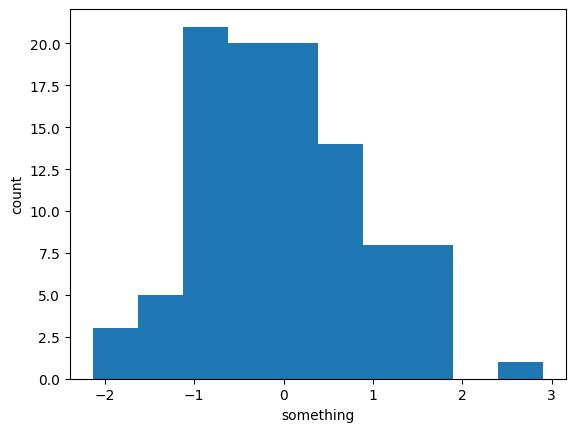

In [3]:
plt.hist(mydish)
plt.xlabel("something")
plt.ylabel("count")
plt.show()

In [4]:
url="https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv"
grbAG=pd.read_csv(url)
grbAG

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


In [5]:
grbAG.columns

Index(['filter', 'time', 'mag', 'magerr', 'upperlimit'], dtype='object')

In [6]:
grbAG[['time', 'mag', 'magerr', 'upperlimit']].corr()

,time,mag,magerr,upperlimit
time,1.000000,0.846971,0.517663,0.506833
mag,0.846971,1.000000,0.602576,NaN
magerr,0.517663,0.602576,1.000000,0.999288
upperlimit,0.506833,NaN,0.999288,1.000000


<Axes: xlabel='time', ylabel='mag'>

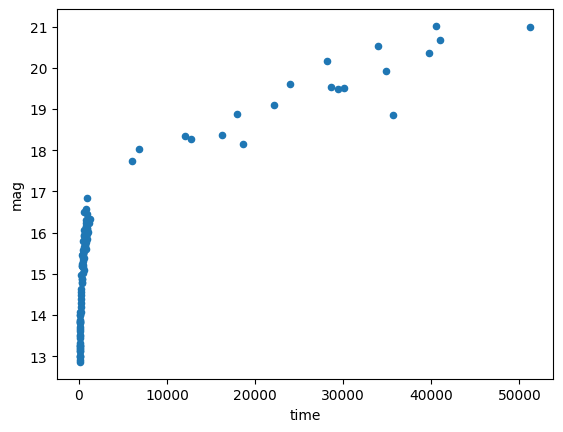

In [7]:
grbAG.plot(x="time",y="mag",kind="scatter")

In [8]:
grbAG['logtime']=np.log10(grbAG.loc[:,'time'])

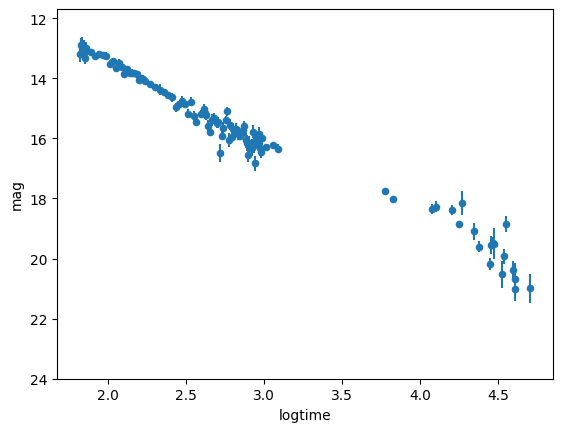

In [9]:
ax=grbAG.plot(x="logtime",y="mag",kind="scatter",yerr="magerr")
ax.set_ylim(24,11.7);

In [10]:
from sklearn.linear_model import LinearRegression

In [13]:
x=grbAG.loc[:,"logtime"].values
x

array([1.81954394, 1.8260748 , 1.83250891, 1.83884909, 1.84509804,
       1.85125835, 1.8573325 , 1.86332286, 1.8920946 , 1.91907809,
       1.94448267, 1.96848295, 1.99122608, 2.01283722, 2.03342376,
       2.05307844, 2.07188201, 2.08990511, 2.10720997, 2.12385164,
       2.13987909, 2.15533604, 2.17026172, 2.18469143, 2.19865709,
       2.2121876 , 2.22530928, 2.2380461 , 2.27184161, 2.30535137,
       2.33243846, 2.35983548, 2.38916608, 2.41161971, 2.4345689 ,
       2.45636603, 2.47567119, 2.49554434, 2.5171959 , 2.53402611,
       2.55145   , 2.56820172, 2.59879051, 2.61595005, 2.62221402,
       2.6294096 , 2.64345268, 2.6580114 , 2.67024585, 2.68304704,
       2.69722934, 2.7084209 , 2.7201593 , 2.73158877, 2.74193908,
       2.75663611, 2.76492298, 2.77451697, 2.78461729, 2.79518459,
       2.80413943, 2.81358099, 2.82347423, 2.83250891, 2.84135947,
       2.85003326, 2.85793526, 2.86628734, 2.87563994, 2.88309336,
       2.8909796 , 2.89872518, 2.90579588, 2.91381385, 2.92168

In [14]:
y=grbAG["mag"].values
y

array([13.21      , 12.9       , 12.86      , 13.01      , 12.97      ,
       13.31      , 13.13      , 13.01      , 13.13      , 13.26      ,
       13.18      , 13.24      , 13.25      , 13.51      , 13.44      ,
       13.67      , 13.48      , 13.62      , 13.86      , 13.7       ,
       13.83      , 13.81      , 13.84      , 13.87      , 14.06      ,
       14.        , 14.01      , 14.08      , 14.18903433, 14.29714678,
       14.38453778, 14.47292871, 14.56755795, 14.64      , 14.96903433,
       14.86714678, 14.76453778, 14.87292871, 15.17755795, 14.79      ,
       15.24903433, 15.45714678, 15.19292871, 15.00755795, 15.15453778,
       15.22      , 15.58903433, 15.78714678, 15.39453778, 15.31292871,
       15.47755795, 15.47      , 16.48903433, 15.90714678, 15.65453778,
       15.38292871, 15.09755795, 16.06      , 15.54903433, 15.94714678,
       15.69453778, 15.81292871, 15.67755795, 15.83      , 15.82903433,
       15.90714678, 15.82453778, 15.71292871, 15.59755795, 16.06

In [15]:
y.shape

(119,)

In [16]:
x.shape

(119,)

In [19]:
grbAG.isna().sum()

,0
filter,0
time,0
mag,11
magerr,0
upperlimit,0
logtime,0


In [21]:
grbAG_nonan=grbAG.dropna()
#grbAg.dropna(inplace=True)

In [22]:
x=grbAG_nonan.loc[:,"logtime"].values
y=grbAG_nonan.loc[:,"mag"].values

In [26]:
X=np.c_[np.ones((len(grbAG_nonan),1)), x]
X.shape

(108, 2)

In [30]:
lr=LinearRegression(fit_intercept=True)
lr.fit(X,y)
lr.coef_

array([0.        , 2.51199984])

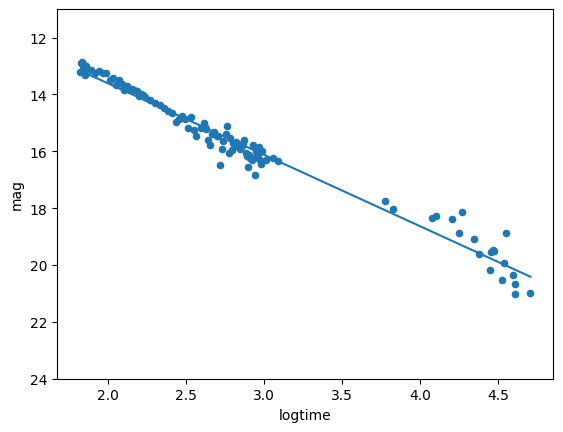

In [35]:
from matplotlib import pylab as plt
ax=grbAG_nonan.plot(x="logtime",y="mag",kind="scatter")
ax.set_ylim(24,11)
x_range=[[1,grbAG_nonan["logtime"].min()], [1,grbAG_nonan["logtime"].max()]]
ax.plot(x,lr.predict(X))